In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        images = image_data.reshape(num_images, rows, cols)
    return images

In [5]:
from google.colab import files
uploaded = files.upload()

Saving t10k-images.idx3-ubyte to t10k-images (1).idx3-ubyte


In [6]:
test_images = load_mnist_images("t10k-images.idx3-ubyte")

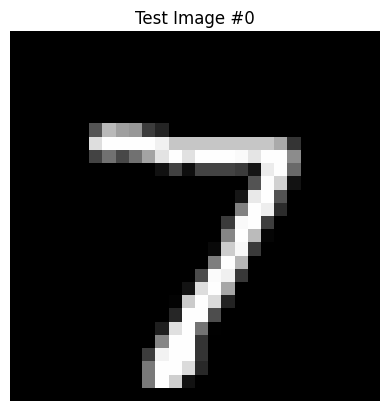

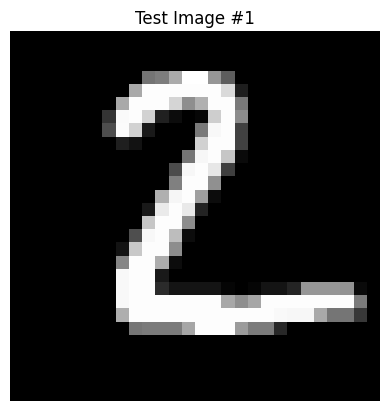

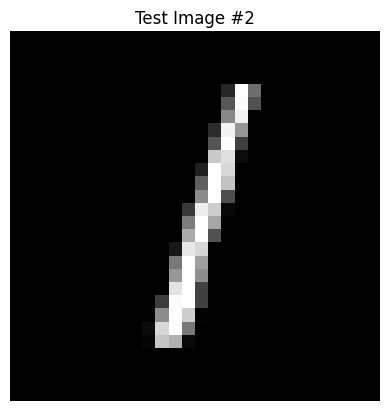

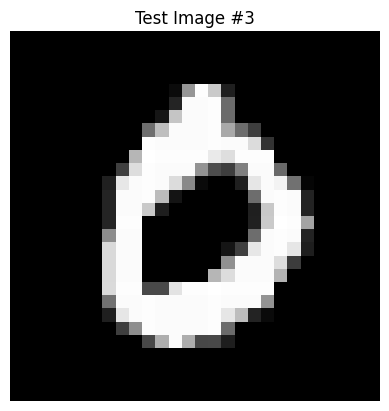

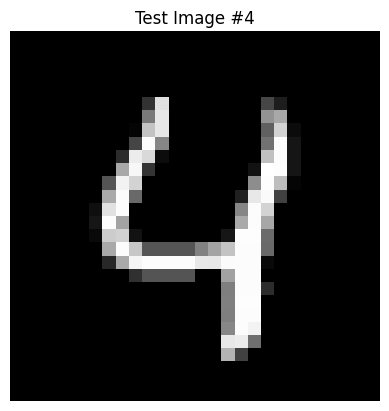

In [7]:
for i in range(5):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Test Image #{i}")
    plt.axis('off')
    plt.show()

In [8]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [10]:
x_train = x_train[..., np.newaxis]
x_val = x_val[..., np.newaxis]
test_images = test_images[..., np.newaxis]


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9139 - loss: 0.2867 - val_accuracy: 0.9853 - val_loss: 0.0483
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9864 - loss: 0.0437 - val_accuracy: 0.9892 - val_loss: 0.0322
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9919 - loss: 0.0255 - val_accuracy: 0.9900 - val_loss: 0.0301
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9907 - val_loss: 0.0298
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.9912 - val_loss: 0.0283


In [14]:
predictions = model.predict(test_images[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


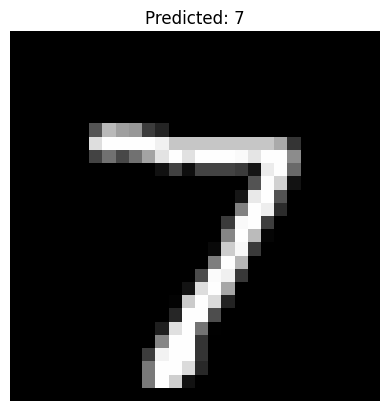

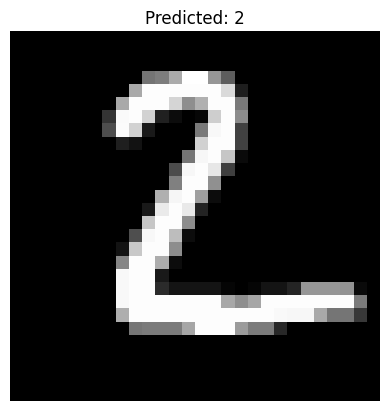

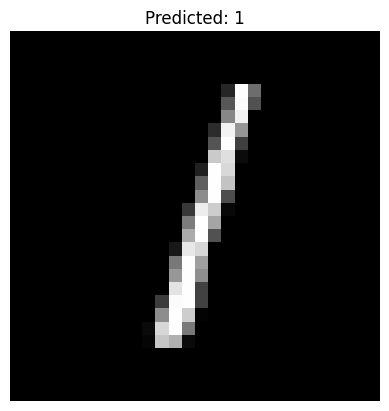

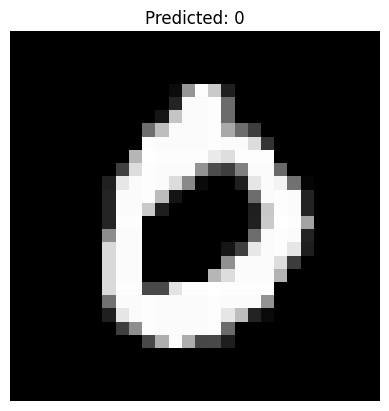

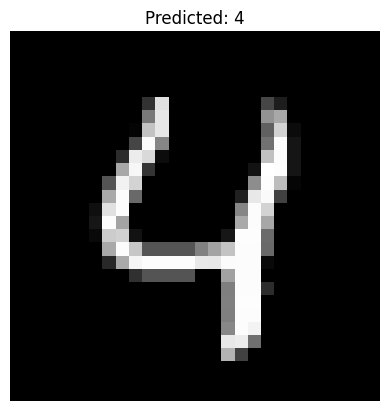

In [15]:
for i, pred in enumerate(predictions):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(pred)}")
    plt.axis('off')
    plt.show()

In [16]:
model.save("mnist_cnn_model.h5")
